In [1]:
# mencari directory saat ini
import os
os.getcwd()

'C:\\Users\\KOMPUTER\\Documents\\Jupyter Notebooks'

In [2]:
# Merubah directory
os.chdir('D:\\ITS\\Tugas Akhir\\Source Code')
# Merubah directory (beneran)
os.chdir('D:/ITS/Tugas Akhir/Source Code')

In [3]:
import numpy as np
import pandas as pd
import glob 

In [4]:
cur_path = "D:/ITS/Tugas Akhir/data/Endaq CSV/"

In [5]:
normal_file_names = glob.glob(cur_path+'/normal/*.csv')
imnormal_misalignment = glob.glob(cur_path+'/misalignment/*.csv')
imnormal_unbalance = glob.glob(cur_path+'/unbalance/*.csv')
imnormal_bearing = glob.glob(cur_path+'/bearing/*.csv')

In [6]:
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [7]:
data_normal = dataReader(normal_file_names)
data_misalignment = dataReader(imnormal_misalignment)
data_unbalance = dataReader(imnormal_unbalance)
data_bearing = dataReader(imnormal_bearing)

In [8]:
# DOWN SAMPLING

def downSampler(data,a,b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
        a += x
        b += x
    return data_decreased

In [9]:
data_normal = downSampler(data_normal, 0, 5000)
data_misalignment = downSampler(data_misalignment, 0, 5000)
data_unbalance = downSampler(data_unbalance, 0, 5000)
data_bearing = downSampler(data_bearing, 0, 5000)

In [10]:
data_misalignment

,0,1,2,3
0,0.130474,0.012886,0.009876,-0.010109
1,0.380527,0.026833,0.028392,-0.016349
2,0.630527,-0.007332,-0.015320,-0.013292
3,0.880534,0.015834,0.023270,-0.004290
4,1.130533,-0.000268,0.000020,-0.005971
...,...,...,...,...
993,3.663596,0.005334,0.009432,-0.003525
994,3.913604,-0.006480,-0.014145,0.000059
995,4.163604,0.025339,0.029569,0.000994
996,4.413611,-0.007813,-0.020164,-0.000312


In [11]:
len(data_misalignment)

998

In [12]:
# FFT

from scipy import signal
def FFT(data):
    autocorr = signal.fftconvolve(data,data[::-1],mode='full')
    return pd.DataFrame(autocorr)

In [13]:
data_normal = FFT(data_normal)
data_misalignment = FFT(data_misalignment)
data_unbalance = FFT(data_unbalance)
data_bearing = FFT(data_bearing)

In [14]:
y_1 = pd.DataFrame(np.full((int(len(data_normal)),1),0))
y_2 = pd.DataFrame(np.full((int(len(data_misalignment)),1),1))
y_3 = pd.DataFrame(np.full((int(len(data_unbalance)),1),2))
y_4 = pd.DataFrame(np.full((int(len(data_bearing)),1),3))
y = pd.concat([y_1,y_2,y_3,y_4], ignore_index=True)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
12153,3
12154,3
12155,3
12156,3


In [15]:
data = pd.concat([data_normal,data_misalignment,data_unbalance,data_bearing],ignore_index=True)

In [16]:
data

,0,1,2,3,4,5,6
0,0.623005,0.067794,0.091318,-0.073082,-0.000054,-4.094008e-05,-0.000001
1,2.421297,0.107115,0.143096,-0.113841,-0.000011,-1.747493e-04,0.000053
2,5.332108,0.164318,0.196033,-0.178904,-0.000081,-2.288879e-04,0.000073
3,9.292989,0.175975,0.236218,-0.186550,-0.000127,-3.708794e-04,0.000153
4,14.241381,0.203066,0.261488,-0.214558,-0.000054,-2.388535e-04,0.000040
...,...,...,...,...,...,...,...
12153,13.911024,0.389112,0.279515,-0.191630,-0.002046,5.075877e-07,-0.000039
12154,9.099801,0.311068,0.265596,-0.169323,-0.001052,1.433499e-04,-0.000063
12155,5.240580,0.299905,0.243329,-0.169188,0.000163,2.534752e-04,-0.000143
12156,2.395820,0.213578,0.196326,-0.130663,0.000337,2.986973e-04,-0.000143


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, shuffle=True)

In [18]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (9726, 7)
Shape of Test Data : (2432, 7)


In [19]:
import tensorflow as tf
#X_train = tf.expand_dims(X_train, axis=-1)
#X_test = tf.expand_dims(X_test, axis=-1)

print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (9726, 7)
Shape of Test Data : (2432, 7)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=2)
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(7,),kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(16, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(4, activation='softmax',kernel_initializer='random_uniform'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 68        
Total params: 45,876
Trainable params: 45,876
Non-trainable params: 0
____________________________________________________

In [21]:
#from sklearn.preprocessing import LabelEncoder
#y = LabelEncoder().fit_transform(y)

In [22]:
hist = model.fit(X_train , y_train , epochs=200, validation_split=0.2)

Epoch 1/200
244/244 [==============================] - 1s 3ms/step - loss: 1.2562 - accuracy: 0.3272 - val_loss: 1.2384 - val_accuracy: 0.3515
Epoch 2/200
244/244 [==============================] - 0s 2ms/step - loss: 1.0811 - accuracy: 0.4860 - val_loss: 0.5987 - val_accuracy: 0.7718
Epoch 3/200
244/244 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8144 - val_loss: 0.3160 - val_accuracy: 0.8191
Epoch 4/200
244/244 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.7907 - val_loss: 0.3345 - val_accuracy: 0.8258
Epoch 5/200
244/244 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8262 - val_loss: 0.2854 - val_accuracy: 0.8428
Epoch 6/200
244/244 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8294 - val_loss: 0.2617 - val_accuracy: 0.8366
Epoch 7/200
244/244 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8305 - val_loss: 0.6396 - val_accuracy: 0.7749

Epoch 58/200
244/244 [==============================] - 0s 2ms/step - loss: 0.7826 - accuracy: 0.8051 - val_loss: 0.2758 - val_accuracy: 0.8905
Epoch 59/200
244/244 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.8603 - val_loss: 0.2480 - val_accuracy: 0.9013
Epoch 60/200
244/244 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8649 - val_loss: 0.2183 - val_accuracy: 0.8890
Epoch 61/200
244/244 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.8689 - val_loss: 0.2249 - val_accuracy: 0.9080
Epoch 62/200
244/244 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.8708 - val_loss: 0.2333 - val_accuracy: 0.8464
Epoch 63/200
244/244 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.8659 - val_loss: 0.2280 - val_accuracy: 0.8556
Epoch 64/200
244/244 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.8728 - val_loss: 0.2158 - val_accuracy:

Epoch 115/200
244/244 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9266 - val_loss: 0.1401 - val_accuracy: 0.9322
Epoch 116/200
244/244 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9265 - val_loss: 0.1560 - val_accuracy: 0.9173
Epoch 117/200
244/244 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9159 - val_loss: 0.1665 - val_accuracy: 0.9224
Epoch 118/200
244/244 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9324 - val_loss: 0.1622 - val_accuracy: 0.9142
Epoch 119/200
244/244 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9311 - val_loss: 0.4392 - val_accuracy: 0.8484
Epoch 120/200
244/244 [==============================] - 0s 2ms/step - loss: 0.1777 - accuracy: 0.9224 - val_loss: 0.1296 - val_accuracy: 0.9404
Epoch 121/200
244/244 [==============================] - 0s 2ms/step - loss: 0.1509 - accuracy: 0.9303 - val_loss: 0.1911 - val_ac

244/244 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9388 - val_loss: 0.1483 - val_accuracy: 0.9306
Epoch 172/200
244/244 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9254 - val_loss: 0.1206 - val_accuracy: 0.9445
Epoch 173/200
244/244 [==============================] - 0s 2ms/step - loss: 0.1487 - accuracy: 0.9320 - val_loss: 0.1140 - val_accuracy: 0.9496
Epoch 174/200
244/244 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9370 - val_loss: 0.1888 - val_accuracy: 0.8998
Epoch 175/200
244/244 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9360 - val_loss: 0.1210 - val_accuracy: 0.9424
Epoch 176/200
244/244 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 0.9346 - val_loss: 0.2566 - val_accuracy: 0.8649
Epoch 177/200
244/244 [==============================] - 0s 2ms/step - loss: 0.1458 - accuracy: 0.9330 - val_loss: 0.1221 - val_accuracy: 0.9491

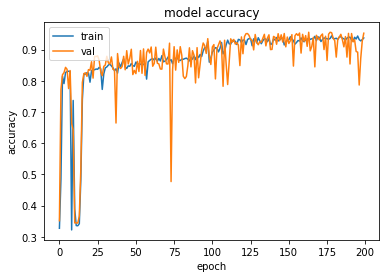

In [23]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

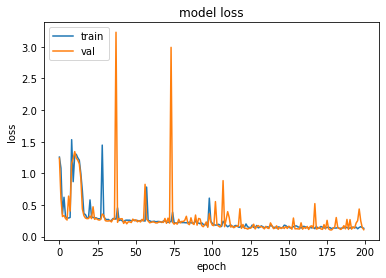

In [24]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9526012539863586
Testing Accuracy:  0.9568256735801697


In [26]:
preds = model.predict(X_test) # label scores 

classpreds = np.argmax(preds, axis=1) # predicted classes 

y_testclass = np.argmax(y_test, axis=1) # true classes

n_classes=4 # number of classes

[[750   0   0   0]
 [408   0   0   0]
 [824   0   0   0]
 [450   0   0   0]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

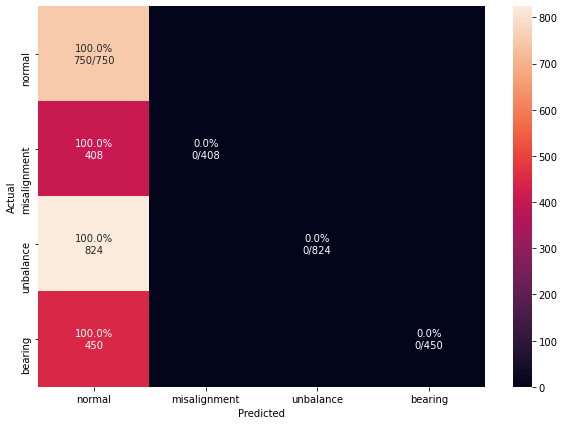

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
c_names = ['normal', 'misalignment', 'unbalance', 'bearing']
cm = confusion_matrix (classpreds, y_testclass)
print(cm)

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = c_names, columns = c_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')